<a href="https://colab.research.google.com/github/juDEcorous/Potential-Datasets-for-Machine-Learning/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **Heart Disease Prediction**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Data Source: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


## Data Dictionary

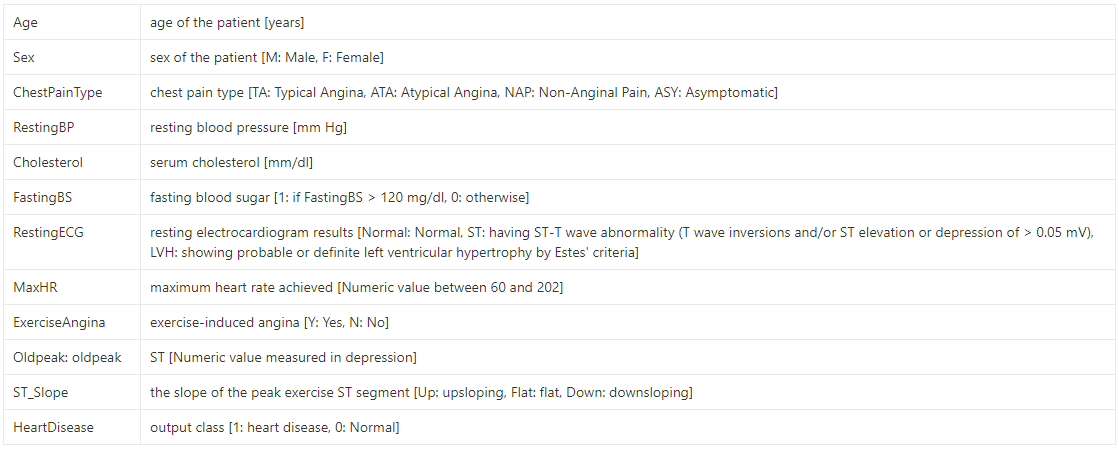



# Imports


In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Inspection

In [ ]:
path = '/content/drive/MyDrive/Datas/project/heart.csv'

In [ ]:
hf = pd.read_csv(path)
hf.info()
hf.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
316,57,M,NAP,105,0,1,Normal,148,N,0.3,Flat,1
509,58,M,ASY,110,198,0,Normal,110,N,0.0,Flat,1
419,55,M,ASY,142,228,0,ST,149,Y,2.5,Up,1
471,68,M,ASY,138,0,0,Normal,130,Y,3.0,Flat,1
250,44,M,ASY,135,491,0,Normal,135,N,0.0,Flat,1


In [ ]:
#Check and address duplicates
hf.duplicated().sum()

0

In [ ]:
#Check and address missing values
hf.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Numerical Columns

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
data_types = hf.dtypes
int_data = data_types[(data_types == 'int')]

for column in int_data.index:
  print(column)
  print(f'Unique Values: {hf[column].unique()}\n')
  print(f'Value Counts: \n{hf[column].value_counts()}\n')
  

float_data = data_types[(data_types == 'float')]

for column in float_data.index:
  print(column)
  print(f'Unique Values: {hf[column].unique()}\n')
  print(f'Value Counts: \n{hf[column].value_counts()}\n')

Age
Unique Values: [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]

Value Counts: 
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

RestingBP
Unique Values: [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]

Value Counts: 
120    132
130    118


In [ ]:
hf.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- **Age Column** are within normal range.
- **RestingBP** have 200 value on it which TOO high but is not impossible as high BP (180/100 mmHG) are actually associated with heart attack, stroke or other life-threathening health problems. A resting BP of 0 is suspicious so we need to drop that sample, if this means that the patient is gone, I believe it is better if sample will not be included in our data set.
- Under the **Cholesterol** column, our 75th percentile value 267 and the max value is 603 which is about twice as many. Also, our minimum shows 0 which is suspicious and there are 172 samples with this value. While doing research, I noticed that the system of unit used was **mm/dL** and most of my sources used **mg/dL**. I am not sure if converting the units from mm/dL to mg/dL would be of any use. For this column we need to ask more details to the Medical Professionals or the one who gathers the data for more informations and  confirmation. But as for now, I will keep this column as it is since we don't know the informations just yet. This is because </br> 
sources: 
  * https://www.medicalnewstoday.com/articles/cholesterol-over-500#:~:text=Triglyceride%20levels%20over%20500%20mg,for%20heart%20disease%20and%20stroke
  * https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=167&contentid=lipid_panel_nonhdl#:~:text=Less%20than%2070%20milligrams%20per,159%20mg%2FdL%20%E2%80%93%20borderline%20high
- **FastingBS** column looks suspicious but it is under ordinal
- **MaxHR** column looks normal
- We need to ask the Medical Prefessionals more about **Oldpeak** column. 6.2 Seems to be an impossible value but when we check all the values under that column we can also see 5 and 5.6 values. For now, I will be saving those data.
- **HeartDisease** column shows us weather a patient have heart disease or not

For now we are going to remove the impossible values (0) in RestingBP column.


In [ ]:
hf.loc[hf.RestingBP == 0]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
hf.drop(449, inplace = True)

In [ ]:
#checking if the row has been dropped
hf.loc[hf.RestingBP == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


## Categorical Column

In [ ]:
obj_data = data_types[(data_types == 'object')]

for column in obj_data.index:
  print(column)
  print(f'Unique Values: {hf[column].unique()}\n')

Sex
Unique Values: ['M' 'F']

ChestPainType
Unique Values: ['ATA' 'NAP' 'ASY' 'TA']

RestingECG
Unique Values: ['Normal' 'ST' 'LVH']

ExerciseAngina
Unique Values: ['N' 'Y']

ST_Slope
Unique Values: ['Up' 'Flat' 'Down']



- We have no inconsistencies in our Categorical Column

## Exploratory Data Analysis

In [92]:
numerical_columns = list(hf.select_dtypes(include='number'))
categorical_columns = list(hf.select_dtypes(include='object'))

### Numerical EDA

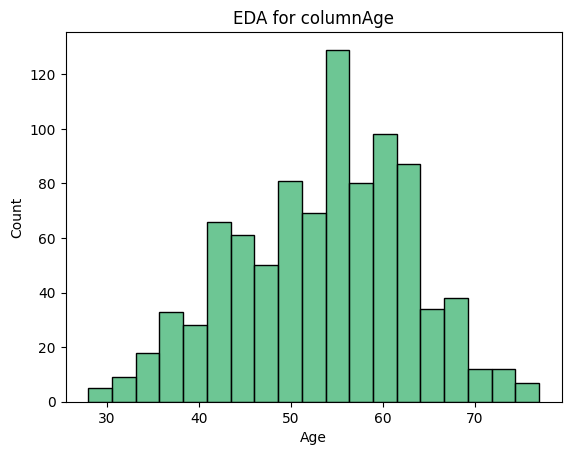

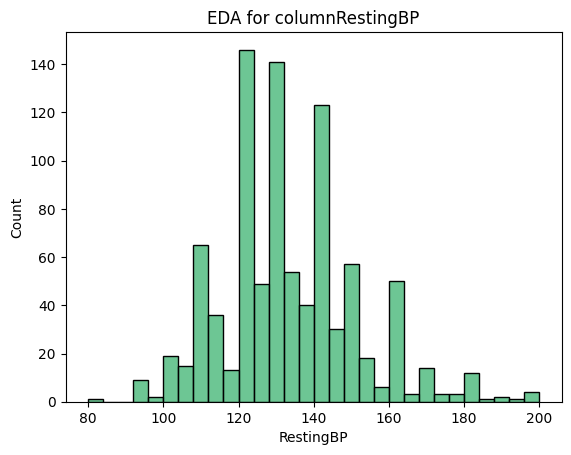

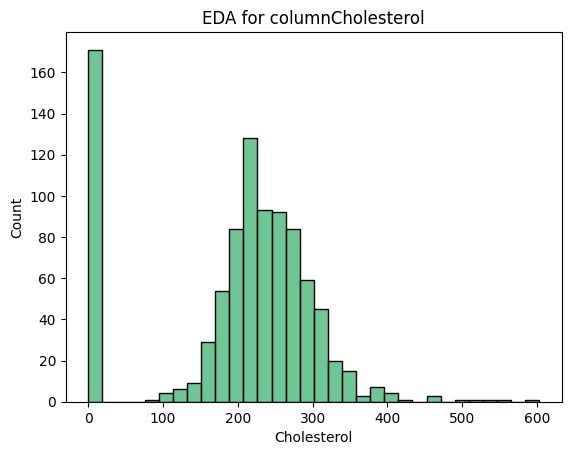

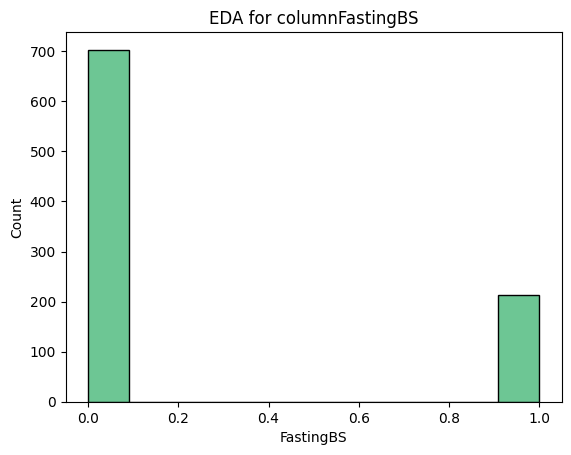

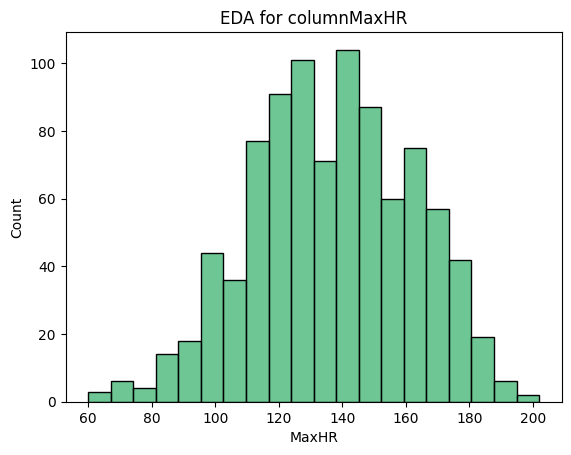

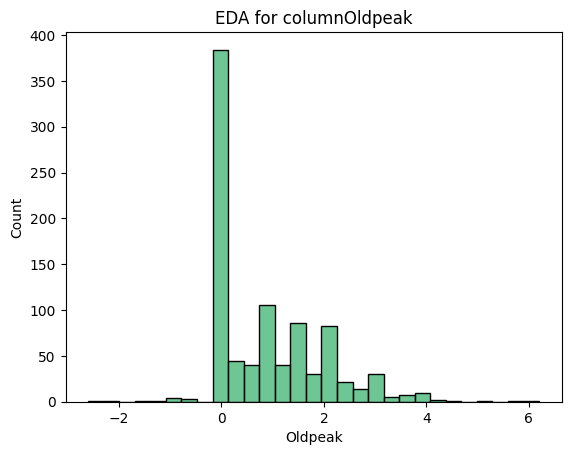

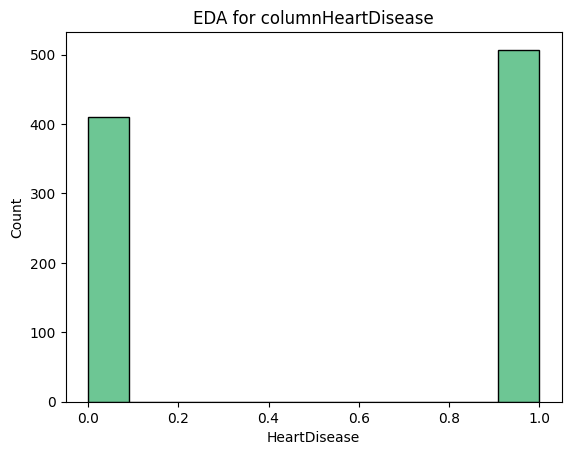

In [97]:
for column in numerical_columns:

  column_name = column
  
  plot = sns.histplot(data = hf, x = column, bins = 'auto', 
                      color='mediumseagreen')
  plot.set_title('EDA for column' + column_name)
  
  plt.show()

### Categorical EDA

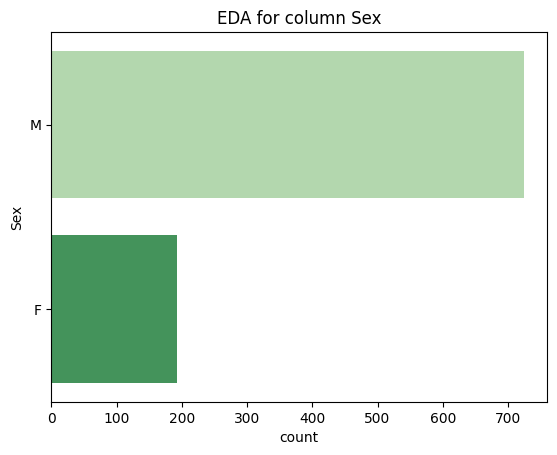

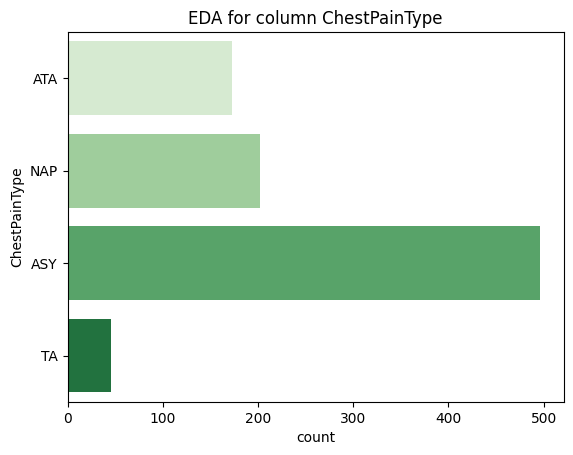

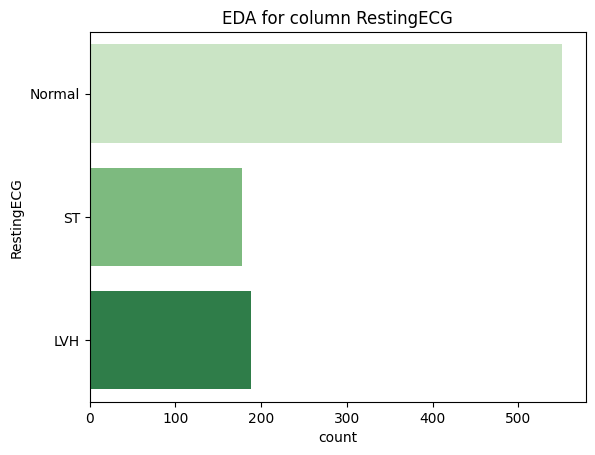

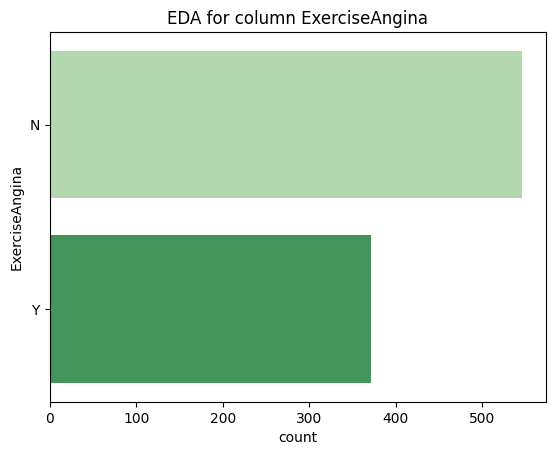

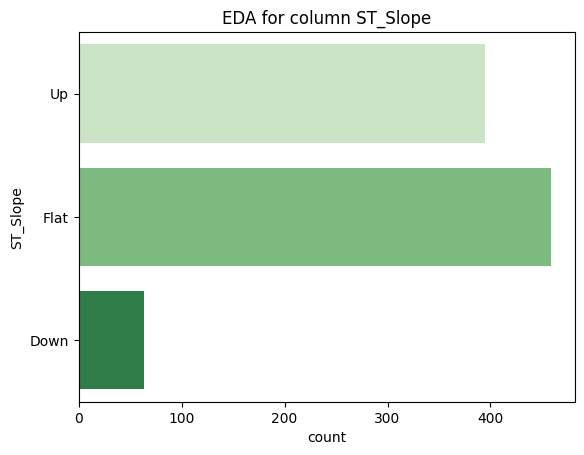

In [96]:
for column in categorical_columns:

  column_name = column
  
  plot = sns.countplot(data = hf, y = column, palette='Greens')
  plot.set_title('EDA for column ' + column_name)
  
  plt.show()

  print('\n\n')